# Tarea final
Hecha por Isis Mociño

In [ ]:
import numpy as np
import math
import random
import matplotlib.pyplot as plt
from numpy import linalg as LA

## Funciones

Primero implementamos la función **sigmoide** (``sig``) y su **derivada** (``dsig``). Como entrada tienen el punto ``x`` donde será evaluada.

In [ ]:
def sig(x):
  return 1/(1+math.exp(-x))

# Derivada de la función Sigmoide
def dsig(x):
  return sig(x)*(1-sig(x))

Haremos uso del **Error Medio Cuadrático (MSE)**, así que implementamos la función ``MSE`` que tiene como entradas: los vectores ``X`` y ``Y``.


In [ ]:
def MSE(X, Y):
  MSE = 0
  for i in range(len(X)):
    MSE += (X[i] - Y[i])**2
  return MSE / len(X)

De igual forma, nos será útil una función para **graficar** los puntos. La función ``PlotPuntos`` recibe:


*   Conjunto ``D``.
*   El resultado de la clasificación del perceptron ``clas``.



In [ ]:
def PlotPuntos(D, clas):
  for i in range(len(D)):
    p = D[i][0]
    if clas[i] == 1.0:
      plt.scatter(p[1], p[2], marker='o', color="green")
    else:
      plt.scatter(p[1], p[2], marker='o', color="red")
  plt.show()

Finalmente, una función que cuente **aciertos**. ``aciertos`` recibe:


*   La clasificación real ``real``.
*   La clasificación del perceptron ``clas``.



In [ ]:
def aciertos(real, clas):
  a = 0
  
  for i in range(len(real)):
    if real[i] == clas[i]:
      a += 1 
  
  return a

Ahora implementamos el **perceptron** en la función ``Perceptron``, que tiene como entradas:
*   El vector de pesos ``w1`` de capa inicial a oculta.
*   El vector de pesos ``w2`` de capa oculta a salida.
*   Conjunto ``D`` de vectores (**x**,y).
*   Función de activación ``g``.

In [ ]:
def Perceptron(w1, w2, D):

  res = np.zeros(len(D))
  ite = 0

  for v in D:
    x = v[0]
    y = v[1]

    sum_oc = np.zeros(4)
    oc = np.zeros(5)
    oc[0] = -1

    for i in range(4):
      for j in range(len(x)):
        sum_oc[i] += w1[j][i] * x[j]
      oc[i+1] = sig(sum_oc[i])

    sum = 0
    out = 0
    for i in range(len(w2)):
      sum += w2[i] * oc[i]
    out = sig(sum)

    res[ite] = out
    ite += 1

  return res

Ahora implementamos la función para **entrenar** y obtener los pesos ``Wei``. Como entradas tiene:


*   Vector ``w1`` de pesos de capa inicial a capa oculta.
*   Vector ``w2`` de pesos de capa oculta a capa de salida.
*   Conjunto ``D`` de vectores (**x**,y).
*   Factor de aprendizaje ``nu``.
*   Límite de iteraciones ``ite``.

In [ ]:
def Wei(w1, w2, D, nu, ite):

  # Obtenemos los  valores reales de clasificación
  real = np.zeros(len(D))
  for i in range(len(D)):
    real[i] = D[i][1]

  for k in range(ite):
    for v in D:
      x = v[0]
      y = v[1]

      sum_oc = np.zeros(4)
      oc = np.zeros(5)
      oc[0] = -1

      # PROPAGATION

      # Trabajamos en la capa oculta
      for i in range(4):
        for j in range(len(x)):
          sum_oc[i] += w1[j][i] * x[j]
        oc[i+1] = sig(sum_oc[i])

      # Trabajamos en la capa de salida
      sum = 0
      out = 0
      for i in range(len(w2)):
        sum += w2[i] * oc[i]
      out = sig(sum)

      # BACK PROPAGATION

      # Error salida
      delta = (y - out)*dsig(sum)

      for i in range(len(w2)):
        w2[i] += nu * oc[i] * delta  # Actualizamos pesos
      
      # Error oculto
      delta_oc = np.zeros(4)

      # Trabajamos en la capa oculta
      for i in range(4):
        delta_oc[i] = oc[i+1] * (1 - oc[i+1]) * w2[i+1] * delta # Error
      
      # Actualizamos pesos
      for i in range(len(x)):
        for j in range(4):
          w1[i][j] += nu * x[i] * delta_oc[j]

    # Ejecutamos el perceptron
    res = Perceptron(w1, w2, D)

    # Terminamos si alcanzamos el error deseado 
    if MSE(res, real) < 1e-5:
      return [w1,w2]

    # Cada 1000 iteraciones imprimimos:  
    if k%1000 == 0:
      # No. de iteraciones
      print("\nIteración ", k)

      # El EMS
      print("MSE: ", MSE(res, real))

      # La gráfica...
      # ... pero primero debemos asignar la clasificación a los puntos:
      for i in range(len(D)):
        if res[i] > 0.5:
          res[i] = 1.0
        else:
          res[i] = 0.0
      PlotPuntos(D, res)

      # Cantidad de aciertos
      print("Aciertos: ",aciertos(real, res)," de ",len(D))
      print("Precisión: ", aciertos(real, res)/len(D))
    
  return [w1,w2]

## 1) Entrenamiento

Primero **generamos** los conjuntos positivo y negativo. En el conjuto positivo los primeros 4 datos serán los vértices del rectángulo, el resto estarán en él.

In [ ]:
# POSITIVO

x_pos = np.zeros(50)
y_pos = np.zeros(50)

# Vértices del rectángulo
x_pos[0] = 2
y_pos[0] = 2
x_pos[1] = 2
y_pos[1] = 6
x_pos[2] = 8
y_pos[2] = 2
x_pos[3] = 8
y_pos[3] = 6

# Resto de puntos
for i in range(4,50):
  x_pos[i] = random.uniform(2.0, 8.0)
  y_pos[i] = random.uniform(2.0, 6.0)


# NEGATIVO

x_neg = np.zeros(50)
y_neg = np.zeros(50)

for i in range(4,50):
  x_neg[i] = random.uniform(0.0, 10.0)
  y_neg[i] = random.uniform(0.0, 8.0)

  # Volvemos a generar las muestras que caen dentro del rectángulo
  while x_neg[i] >= 2.0 and x_neg[i] <= 8.0 and y_neg[i] >= 2.0 and y_neg[i] <= 6.0:
    x_neg[i] = random.uniform(0.0, 10.0)
    y_neg[i] = random.uniform(0.0, 8.0)

Graficamos ambos conjuntos.

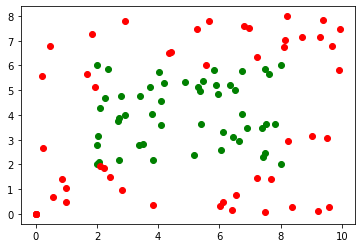

In [ ]:
plt.scatter([x_pos], [y_pos], marker="o", color="green")
plt.scatter([x_neg], [y_neg], marker="o", color="red")
plt.show()

Ahora, **dividimos** el conjunto en el de entrenamiento (70%) y el de validación (30%).

In [ ]:
ent = [[[-1, 0, 0], -1]] * 70 # conjunto entrenamiento
eva = [[[-1, 0, 0], -1]] * 30 # conjunto evaluación

# Asignamos los primeros 35 elementos del conjunto positivo y negativo
for i in range(35):
  ent[i] = [[-1, x_pos[i], y_pos[i]], 1]
  ent[i + 35] = [[-1, x_neg[i], y_neg[i]], 0]

# Asignamos los siguientes 15 elementos del conjunto positivo y negativo
for i in range(15):
  eva[i] = [[-1, x_pos[i + 35], y_pos[i + 35]], 1]
  eva[i + 15] = [[-1, x_neg[i + 35], y_neg[i + 35]], 0]

Graficamos ambos conjuntos.

Conjunto de entrenamiento:


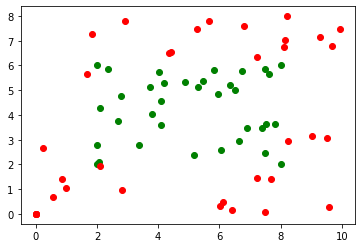


Conjunto de evaluación:


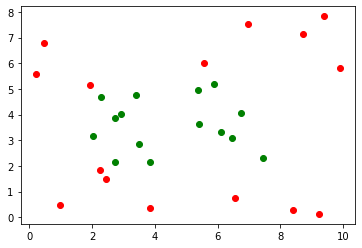

In [ ]:
print('Conjunto de entrenamiento:')

for i in range(len(ent)):
  x = ent[i][0]
  if i >= 0 and i < 35:
    plt.scatter(x[1], x[2], marker="o", color="green")
  else:
    plt.scatter(x[1], x[2], marker="o", color="red")

plt.show()

print('\nConjunto de evaluación:')

for i in range(len(eva)):
  x = eva[i][0]
  if i >= 0 and i < 15:
    plt.scatter(x[1], x[2], marker="o", color="green")
  else:
    plt.scatter(x[1], x[2], marker="o", color="red")

plt.show()

Procedemos a **entrenar** a la red.


Iteración  0
MSE:  0.2484764751625737


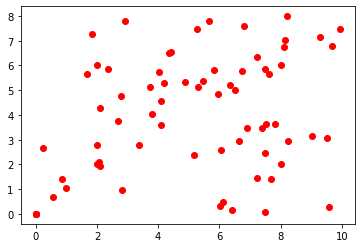

Aciertos:  35  de  70
Precisión:  0.5

Iteración  1000
MSE:  0.19178328292173838


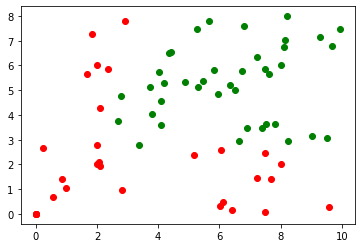

Aciertos:  45  de  70
Precisión:  0.6428571428571429

Iteración  2000
MSE:  0.28684070221107605


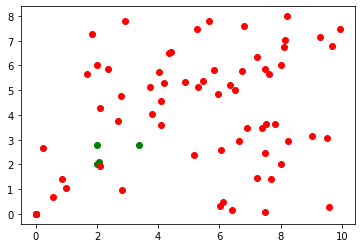

Aciertos:  39  de  70
Precisión:  0.5571428571428572

Iteración  3000
MSE:  0.15585414144940715


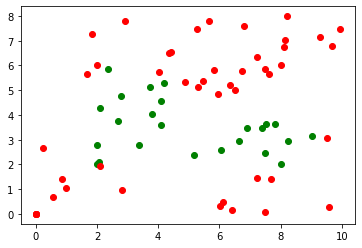

Aciertos:  55  de  70
Precisión:  0.7857142857142857

Iteración  4000
MSE:  0.08789780479293907


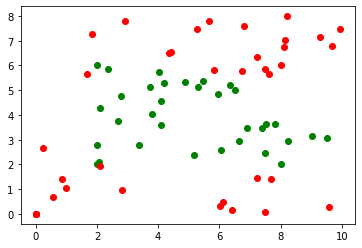

Aciertos:  62  de  70
Precisión:  0.8857142857142857

Iteración  5000
MSE:  0.06689062756442526


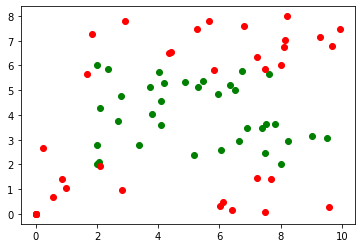

Aciertos:  64  de  70
Precisión:  0.9142857142857143

Iteración  6000
MSE:  0.0570101451389429


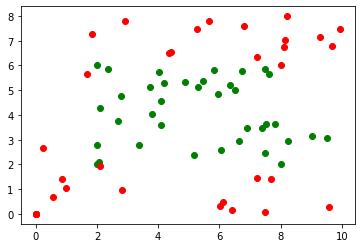

Aciertos:  66  de  70
Precisión:  0.9428571428571428

Iteración  7000
MSE:  0.05852432439603801


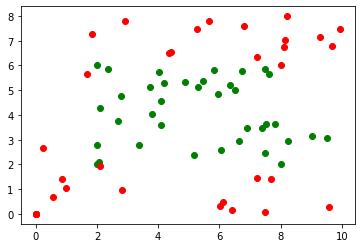

Aciertos:  66  de  70
Precisión:  0.9428571428571428

Iteración  8000
MSE:  0.06125451031633763


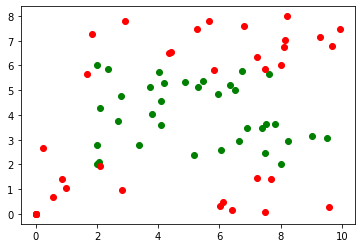

Aciertos:  64  de  70
Precisión:  0.9142857142857143

Iteración  9000
MSE:  0.05589338270899343


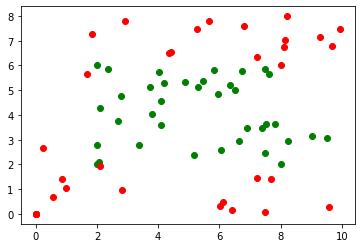

Aciertos:  66  de  70
Precisión:  0.9428571428571428

Iteración  10000
MSE:  0.0534505600503429


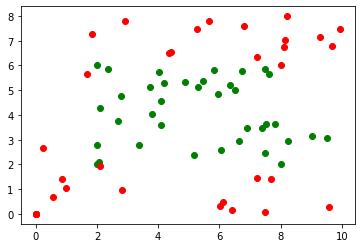

Aciertos:  66  de  70
Precisión:  0.9428571428571428

Iteración  11000
MSE:  0.05166156408399773


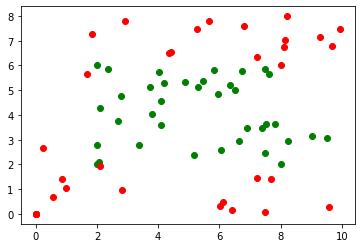

Aciertos:  66  de  70
Precisión:  0.9428571428571428

Iteración  12000
MSE:  0.048976060633614524


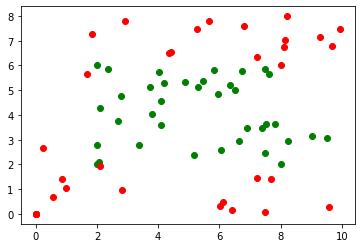

Aciertos:  66  de  70
Precisión:  0.9428571428571428


In [ ]:
# Pesos de capa inicial a oculta
w1 = [ [0.0] * 4 ] * 3

# Los generamos de manera aleatoria
for i in range(3):
  w1[i] = [random.uniform(0.0, 1.0), random.uniform(0.0, 1.0), random.uniform(0.0, 1.0), random.uniform(0.0, 1.0)]

# Pesos de capa oculta a final
# Los generamos de manera aleatoria
w2 = [random.uniform(0.0, 1.0), random.uniform(0.0, 1.0), random.uniform(0.0, 1.0), random.uniform(0.0, 1.0), random.uniform(0.0, 1.0)]

# Entrenamiento
fw1, fw2 = Wei(np.array(w1), np.array(w2), ent, 0.1, 12001)

Con el resultado arrojado por el entrenamiento, **evaluamos** el perceptron con el conjunto de evaluación.

MSE:  0.06254714524951636


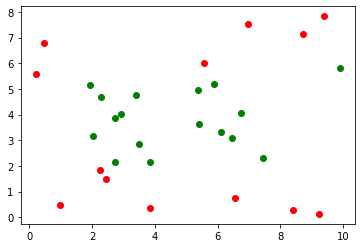

Aciertos:  28  de  30
Precisión:  0.9333333333333333


In [ ]:
D = eva

res = Perceptron(np.array(fw1), np.array(fw2), D)

real = np.zeros(len(D))

for i in range(len(D)):
  real[i] = D[i][1]

# El EMS
print("MSE: ", MSE(res, real))

# La gráfica...
# ... pero primero debemos asignar la clasificación a los puntos:
for i in range(len(D)):
  if res[i] > 0.5:
    res[i] = 1.0
  else:
    res[i] = 0.0
PlotPuntos(D, res)

# Cantidad de aciertos
print("Aciertos: ",aciertos(real, res)," de ",len(D))
print("Precisión: ", aciertos(real, res)/len(D))

## 2) Acerca del conjunto de entrenamiento

**a) Error cuadrático del conjunto**

En la iteración 0 podemos observar que el error cuadrático es 0.2484764751625737. Tras 12,000 iteraciones se alcanza un error cuadrático de 0.048976060633614524.

**b) ¿Cuántas muestras están bien/mal calificadas?**

Se clasifican correctamente 66 de 70 muestras.



## 3) Precisión de clasificación de la red sobre el conjunto de entrenamiento

Se alcanza una precisión de 0.9428571428571428.

## 4) Acerca del conjunto de validación

**a) Error cuadrático del conjunto**

El error cuadrático es 0.06254714524951636.

**b) ¿Cuántas muestras están bien/mal calificadas?**

Se clasifican correctamente 28 de 30 muestras.

## 5) Precisión de clasificación de la red sobre el conjunto de validación

Se alcanza una precisión de 0.9333333333333333.

## 6) Iteraciones necesarias para entrenar la red

El error deseado nunca se alcanzó, así que se realizaron 12,000 iteraciones, pues fue el límite que se le dió además del error.

## 7) Tamaño y parámetros del perceptrón aprendido

Trabajamos con un perceptrón de dos capas con tres entradas, donde la capa oculta se constituía de 4 neuronas y la de salida únicamente de una neurona.

Por otro lado, el parámetro aprendido fue de 0.9428571428571428.

## 8) Función de cada neurona de la capa escondida

La capa oculta emplea 4 neuronas. Ya que queremos emular la división que realiza el recántugo y éste cuenta con 4 aristas, cada neurona divide en 2 el conjunto mediante una línea recta. Donde cada una de estas divisiones intersecta representa el rectángulo deseado, que es donde se encuentra el conjunto positivo.